In [5]:
#%%
from pymc3 import Model, Normal, HalfNormal
import numpy as np
import matplotlib.pyplot as plt

#%%

#%% Initialize random number generator
np.random.seed(123)

#%% True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

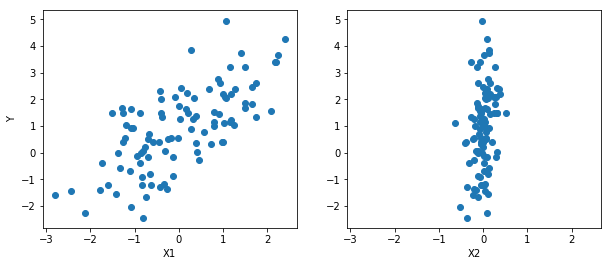

In [7]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [8]:
basic_model = Model()
with basic_model:
    # Priors
    alpha = Normal('alpha', mu = 0, sd = 10)
    beta = Normal('beta', mu = 0, sd = 10, shape = 2)
    sigma = HalfNormal('sigma', sd = 1)

    # Regresion
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood
    y_obs = Normal('y_obs', mu = mu, sd = sigma, observed = Y)

In [9]:
from pymc3 import NUTS, sample
from scipy import optimize

with basic_model:
    # draw 2000 posterior samples
    trace = sample(2000)

Auto-assigning NUTS sampler...


Initializing NUTS using advi...


  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 838/200000 [00:00<00:23, 8374.82it/s]

  1%|          | 1717/200000 [00:00<00:23, 8494.80it/s]

  1%|▏         | 2762/200000 [00:00<00:21, 8998.04it/s]

  2%|▏         | 3797/200000 [00:00<00:20, 9363.53it/s]

  2%|▏         | 4838/200000 [00:00<00:20, 9651.95it/s]

  3%|▎         | 5877/200000 [00:00<00:19, 9858.72it/s]

  3%|▎         | 6886/200000 [00:00<00:19, 9925.60it/s]

  4%|▍         | 7929/200000 [00:00<00:19, 10069.24it/s]

  4%|▍         | 8968/200000 [00:00<00:18, 10162.18it/s]

  5%|▌         | 10010/200000 [00:01<00:18, 10235.31it/s]

  6%|▌         | 11013/200000 [00:01<00:18, 10056.38it/s]

  6%|▌         | 12054/200000 [00:01<00:18, 10157.90it/s]

  7%|▋         | 13094/200000 [00:01<00:18, 10227.64it/s]

  7%|▋         | 14140/200000 [00:01<00:18, 10295.74it/s]

  8%|▊         | 15169/200000 [00:01<00:17, 10292.13it/s]

  8%|▊         | 16213/200000 [00:01<00:17, 10333.90it/s]

  9%|▊         | 17245/200000 [00:01<00:18, 9922.25it/s] 

  9%|▉         | 18279/200000 [00:01<00:18, 10042.67it/s]

 10%|▉         | 19308/200000 [00:01<00:17, 10112.78it/s]

Average ELBO = -299.25:  10%|█         | 20342/200000 [00:02<00:17, 10178.90it/s]

Average ELBO = -299.25:  11%|█         | 21383/200000 [00:02<00:17, 10246.51it/s]

Average ELBO = -299.25:  11%|█         | 22424/200000 [00:02<00:17, 10292.42it/s]

Average ELBO = -299.25:  12%|█▏        | 23454/200000 [00:02<00:17, 10208.74it/s]

Average ELBO = -299.25:  12%|█▏        | 24476/200000 [00:02<00:17, 10171.01it/s]

Average ELBO = -299.25:  13%|█▎        | 25494/200000 [00:02<00:17, 10047.72it/s]

Average ELBO = -299.25:  13%|█▎        | 26516/200000 [00:02<00:17, 10098.20it/s]

Average ELBO = -299.25:  14%|█▍        | 27527/200000 [00:02<00:17, 10013.97it/s]

Average ELBO = -299.25:  14%|█▍        | 28529/200000 [00:02<00:17, 10001.77it/s]

Average ELBO = -299.25:  15%|█▍        | 29557/200000 [00:02<00:16, 10081.07it/s]

Average ELBO = -299.25:  15%|█▌        | 30566/200000 [00:03<00:17, 9804.92it/s] 

Average ELBO = -299.25:  16%|█▌        | 31592/200000 [00:03<00:16, 9935.77it/s]

Average ELBO = -299.25:  16%|█▋        | 32627/200000 [00:03<00:16, 10055.55it/s]

Average ELBO = -299.25:  17%|█▋        | 33674/200000 [00:03<00:16, 10173.99it/s]

Average ELBO = -299.25:  17%|█▋        | 34722/200000 [00:03<00:16, 10262.24it/s]

Average ELBO = -299.25:  18%|█▊        | 35764/200000 [00:03<00:15, 10306.50it/s]

Average ELBO = -299.25:  18%|█▊        | 36796/200000 [00:03<00:15, 10303.90it/s]

Average ELBO = -299.25:  19%|█▉        | 37836/200000 [00:03<00:15, 10332.17it/s]

Average ELBO = -299.25:  19%|█▉        | 38870/200000 [00:03<00:15, 10324.40it/s]

Average ELBO = -299.25:  20%|█▉        | 39910/200000 [00:03<00:15, 10343.10it/s]

Average ELBO = -153.5:  20%|██        | 40951/200000 [00:04<00:15, 10361.01it/s] 

Average ELBO = -153.5:  21%|██        | 41995/200000 [00:04<00:15, 10379.69it/s]

Average ELBO = -153.5:  22%|██▏       | 43040/200000 [00:04<00:15, 10400.56it/s]

Average ELBO = -153.5:  22%|██▏       | 44091/200000 [00:04<00:14, 10431.47it/s]

Average ELBO = -153.5:  23%|██▎       | 45138/200000 [00:04<00:14, 10441.69it/s]

Average ELBO = -153.5:  23%|██▎       | 46183/200000 [00:04<00:14, 10441.49it/s]

Average ELBO = -153.5:  24%|██▎       | 47228/200000 [00:04<00:14, 10433.19it/s]

Average ELBO = -153.5:  24%|██▍       | 48272/200000 [00:04<00:14, 10408.57it/s]

Average ELBO = -153.5:  25%|██▍       | 49313/200000 [00:04<00:14, 10404.88it/s]

Average ELBO = -153.5:  25%|██▌       | 50354/200000 [00:04<00:14, 10391.55it/s]

Average ELBO = -153.5:  26%|██▌       | 51394/200000 [00:05<00:14, 10391.22it/s]

Average ELBO = -153.5:  26%|██▌       | 52444/200000 [00:05<00:14, 10419.79it/s]

Average ELBO = -153.5:  27%|██▋       | 53495/200000 [00:05<00:14, 10444.82it/s]

Average ELBO = -153.5:  27%|██▋       | 54540/200000 [00:05<00:14, 10246.24it/s]

Average ELBO = -153.5:  28%|██▊       | 55571/200000 [00:05<00:14, 10263.48it/s]

Average ELBO = -153.5:  28%|██▊       | 56601/200000 [00:05<00:13, 10273.15it/s]

Average ELBO = -153.5:  29%|██▉       | 57640/200000 [00:05<00:13, 10306.02it/s]

Average ELBO = -153.5:  29%|██▉       | 58677/200000 [00:05<00:13, 10322.45it/s]

Average ELBO = -153.5:  30%|██▉       | 59711/200000 [00:05<00:13, 10326.63it/s]

Average ELBO = -153.48:  30%|███       | 60756/200000 [00:05<00:13, 10358.52it/s]

Average ELBO = -153.48:  31%|███       | 61792/200000 [00:06<00:13, 10311.68it/s]

Average ELBO = -153.48:  31%|███▏      | 62831/200000 [00:06<00:13, 10332.28it/s]

Average ELBO = -153.48:  32%|███▏      | 63865/200000 [00:06<00:13, 10329.20it/s]

Average ELBO = -153.48:  32%|███▏      | 64898/200000 [00:06<00:13, 10317.28it/s]

Average ELBO = -153.48:  33%|███▎      | 65940/200000 [00:06<00:12, 10344.00it/s]

Average ELBO = -153.48:  33%|███▎      | 66976/200000 [00:06<00:12, 10342.25it/s]

Average ELBO = -153.48:  34%|███▍      | 68011/200000 [00:06<00:12, 10307.27it/s]

Average ELBO = -153.48:  35%|███▍      | 69046/200000 [00:06<00:12, 10317.37it/s]

Average ELBO = -153.48:  35%|███▌      | 70078/200000 [00:06<00:12, 10289.55it/s]

Average ELBO = -153.48:  36%|███▌      | 71116/200000 [00:06<00:12, 10316.14it/s]

Average ELBO = -153.48:  36%|███▌      | 72148/200000 [00:07<00:12, 10267.29it/s]

Average ELBO = -153.48:  37%|███▋      | 73175/200000 [00:07<00:12, 10227.67it/s]

Average ELBO = -153.48:  37%|███▋      | 74212/200000 [00:07<00:12, 10269.13it/s]

Average ELBO = -153.48:  38%|███▊      | 75240/200000 [00:07<00:12, 10195.28it/s]

Average ELBO = -153.48:  38%|███▊      | 76278/200000 [00:07<00:12, 10249.24it/s]

Average ELBO = -153.48:  39%|███▊      | 77316/200000 [00:07<00:11, 10285.73it/s]

Average ELBO = -153.48:  39%|███▉      | 78368/200000 [00:07<00:11, 10351.82it/s]

Average ELBO = -153.48:  40%|███▉      | 79416/200000 [00:07<00:11, 10387.75it/s]

Average ELBO = -153.51:  40%|████      | 80455/200000 [00:07<00:11, 10364.74it/s]

Average ELBO = -153.51:  41%|████      | 81496/200000 [00:07<00:11, 10377.50it/s]

Average ELBO = -153.51:  41%|████▏     | 82540/200000 [00:08<00:11, 10396.08it/s]

Average ELBO = -153.51:  42%|████▏     | 83591/200000 [00:08<00:11, 10428.73it/s]

Average ELBO = -153.51:  42%|████▏     | 84642/200000 [00:08<00:11, 10451.54it/s]

Average ELBO = -153.51:  43%|████▎     | 85688/200000 [00:08<00:10, 10431.32it/s]

Average ELBO = -153.51:  43%|████▎     | 86732/200000 [00:08<00:10, 10421.96it/s]

Average ELBO = -153.51:  44%|████▍     | 87775/200000 [00:08<00:10, 10414.84it/s]

Average ELBO = -153.51:  44%|████▍     | 88822/200000 [00:08<00:10, 10427.19it/s]

Average ELBO = -153.51:  45%|████▍     | 89872/200000 [00:08<00:10, 10446.81it/s]

Average ELBO = -153.51:  45%|████▌     | 90917/200000 [00:08<00:10, 10443.60it/s]

Average ELBO = -153.51:  46%|████▌     | 91962/200000 [00:08<00:10, 10437.42it/s]

Average ELBO = -153.51:  47%|████▋     | 93006/200000 [00:09<00:10, 10425.15it/s]

Average ELBO = -153.51:  47%|████▋     | 94057/200000 [00:09<00:10, 10450.31it/s]

Average ELBO = -153.51:  48%|████▊     | 95103/200000 [00:09<00:10, 10444.26it/s]

Average ELBO = -153.51:  48%|████▊     | 96149/200000 [00:09<00:09, 10447.94it/s]

Average ELBO = -153.51:  49%|████▊     | 97200/200000 [00:09<00:09, 10465.42it/s]

Average ELBO = -153.51:  49%|████▉     | 98249/200000 [00:09<00:09, 10469.99it/s]

Average ELBO = -153.51:  50%|████▉     | 99297/200000 [00:09<00:09, 10450.40it/s]

Average ELBO = -153.49:  50%|█████     | 100343/200000 [00:09<00:09, 10435.07it/s]

Average ELBO = -153.49:  51%|█████     | 101387/200000 [00:09<00:09, 10429.61it/s]

Average ELBO = -153.49:  51%|█████     | 102430/200000 [00:09<00:09, 10410.61it/s]

Average ELBO = -153.49:  52%|█████▏    | 103472/200000 [00:10<00:09, 10402.05it/s]

Average ELBO = -153.49:  52%|█████▏    | 104517/200000 [00:10<00:09, 10416.23it/s]

Average ELBO = -153.49:  53%|█████▎    | 105559/200000 [00:10<00:09, 10408.34it/s]

Average ELBO = -153.49:  53%|█████▎    | 106601/200000 [00:10<00:08, 10408.77it/s]

Average ELBO = -153.49:  54%|█████▍    | 107653/200000 [00:10<00:08, 10441.46it/s]

Average ELBO = -153.49:  54%|█████▍    | 108698/200000 [00:10<00:08, 10369.34it/s]

Average ELBO = -153.49:  55%|█████▍    | 109750/200000 [00:10<00:08, 10414.05it/s]

Average ELBO = -153.49:  55%|█████▌    | 110802/200000 [00:10<00:08, 10445.46it/s]

Average ELBO = -153.49:  56%|█████▌    | 111847/200000 [00:10<00:08, 10410.54it/s]

Average ELBO = -153.49:  56%|█████▋    | 112889/200000 [00:10<00:08, 10405.61it/s]

Average ELBO = -153.49:  57%|█████▋    | 113930/200000 [00:11<00:08, 10404.37it/s]

Average ELBO = -153.49:  57%|█████▋    | 114981/200000 [00:11<00:08, 10433.53it/s]

Average ELBO = -153.49:  58%|█████▊    | 116032/200000 [00:11<00:08, 10456.08it/s]

Average ELBO = -153.49:  59%|█████▊    | 117079/200000 [00:11<00:07, 10457.99it/s]

Average ELBO = -153.49:  59%|█████▉    | 118125/200000 [00:11<00:07, 10427.25it/s]

Average ELBO = -153.49:  60%|█████▉    | 119168/200000 [00:11<00:07, 10365.71it/s]

Average ELBO = -153.5:  60%|██████    | 120205/200000 [00:11<00:07, 10331.54it/s] 

Average ELBO = -153.5:  61%|██████    | 121253/200000 [00:11<00:07, 10373.45it/s]

Average ELBO = -153.5:  61%|██████    | 122299/200000 [00:11<00:07, 10397.46it/s]

Average ELBO = -153.5:  62%|██████▏   | 123347/200000 [00:11<00:07, 10418.45it/s]

Average ELBO = -153.5:  62%|██████▏   | 124389/200000 [00:12<00:07, 10415.79it/s]

Average ELBO = -153.5:  63%|██████▎   | 125432/200000 [00:12<00:07, 10419.27it/s]

Average ELBO = -153.5:  63%|██████▎   | 126476/200000 [00:12<00:07, 10423.35it/s]

Average ELBO = -153.5:  64%|██████▍   | 127519/200000 [00:12<00:06, 10403.70it/s]

Average ELBO = -153.5:  64%|██████▍   | 128564/200000 [00:12<00:06, 10416.14it/s]

Average ELBO = -153.5:  65%|██████▍   | 129606/200000 [00:12<00:06, 10402.64it/s]

Average ELBO = -153.5:  65%|██████▌   | 130652/200000 [00:12<00:06, 10417.57it/s]

Average ELBO = -153.5:  66%|██████▌   | 131694/200000 [00:12<00:06, 10389.84it/s]

Average ELBO = -153.5:  66%|██████▋   | 132734/200000 [00:12<00:06, 10388.41it/s]

Average ELBO = -153.5:  67%|██████▋   | 133785/200000 [00:12<00:06, 10420.95it/s]

Average ELBO = -153.5:  67%|██████▋   | 134828/200000 [00:13<00:06, 10394.10it/s]

Average ELBO = -153.5:  68%|██████▊   | 135871/200000 [00:13<00:06, 10401.60it/s]

Average ELBO = -153.5:  68%|██████▊   | 136912/200000 [00:13<00:06, 10336.62it/s]

Average ELBO = -153.5:  69%|██████▉   | 137954/200000 [00:13<00:05, 10358.55it/s]

Average ELBO = -153.5:  69%|██████▉   | 138999/200000 [00:13<00:05, 10383.04it/s]

Average ELBO = -153.49:  70%|███████   | 140038/200000 [00:13<00:05, 10358.44it/s]

Average ELBO = -153.49:  71%|███████   | 141086/200000 [00:13<00:05, 10391.92it/s]

Average ELBO = -153.49:  71%|███████   | 142126/200000 [00:13<00:05, 10373.41it/s]

Average ELBO = -153.49:  72%|███████▏  | 143166/200000 [00:13<00:05, 10378.11it/s]

Average ELBO = -153.49:  72%|███████▏  | 144213/200000 [00:13<00:05, 10405.44it/s]

Average ELBO = -153.49:  73%|███████▎  | 145254/200000 [00:14<00:05, 10362.03it/s]

Average ELBO = -153.49:  73%|███████▎  | 146293/200000 [00:14<00:05, 10368.58it/s]

Average ELBO = -153.49:  74%|███████▎  | 147336/200000 [00:14<00:05, 10386.03it/s]

Average ELBO = -153.49:  74%|███████▍  | 148381/200000 [00:14<00:04, 10402.22it/s]

Average ELBO = -153.49:  75%|███████▍  | 149426/200000 [00:14<00:04, 10415.04it/s]

Average ELBO = -153.49:  75%|███████▌  | 150468/200000 [00:14<00:04, 10363.63it/s]

Average ELBO = -153.49:  76%|███████▌  | 151510/200000 [00:14<00:04, 10377.53it/s]

Average ELBO = -153.49:  76%|███████▋  | 152554/200000 [00:14<00:04, 10393.65it/s]

Average ELBO = -153.49:  77%|███████▋  | 153594/200000 [00:14<00:04, 10390.82it/s]

Average ELBO = -153.49:  77%|███████▋  | 154634/200000 [00:14<00:04, 10370.28it/s]

Average ELBO = -153.49:  78%|███████▊  | 155672/200000 [00:15<00:04, 10368.75it/s]

Average ELBO = -153.49:  78%|███████▊  | 156709/200000 [00:15<00:04, 10334.96it/s]

Average ELBO = -153.49:  79%|███████▉  | 157743/200000 [00:15<00:04, 10329.94it/s]

Average ELBO = -153.49:  79%|███████▉  | 158792/200000 [00:15<00:03, 10374.55it/s]

Average ELBO = -153.49:  80%|███████▉  | 159830/200000 [00:15<00:03, 10356.40it/s]

Average ELBO = -153.49:  80%|████████  | 160866/200000 [00:15<00:03, 10350.47it/s]

Average ELBO = -153.49:  81%|████████  | 161910/200000 [00:15<00:03, 10372.34it/s]

Average ELBO = -153.49:  81%|████████▏ | 162951/200000 [00:15<00:03, 10381.96it/s]

Average ELBO = -153.49:  82%|████████▏ | 163990/200000 [00:15<00:03, 10371.09it/s]

Average ELBO = -153.49:  83%|████████▎ | 165029/200000 [00:15<00:03, 10372.22it/s]

Average ELBO = -153.49:  83%|████████▎ | 166067/200000 [00:16<00:03, 10346.13it/s]

Average ELBO = -153.49:  84%|████████▎ | 167116/200000 [00:16<00:03, 10388.57it/s]

Average ELBO = -153.49:  84%|████████▍ | 168161/200000 [00:16<00:03, 10403.41it/s]

Average ELBO = -153.49:  85%|████████▍ | 169202/200000 [00:16<00:02, 10273.20it/s]

Average ELBO = -153.49:  85%|████████▌ | 170230/200000 [00:16<00:02, 10190.99it/s]

Average ELBO = -153.49:  86%|████████▌ | 171250/200000 [00:16<00:02, 10155.18it/s]

Average ELBO = -153.49:  86%|████████▌ | 172283/200000 [00:16<00:02, 10204.85it/s]

Average ELBO = -153.49:  87%|████████▋ | 173304/200000 [00:16<00:02, 10169.34it/s]

Average ELBO = -153.49:  87%|████████▋ | 174339/200000 [00:16<00:02, 10222.24it/s]

Average ELBO = -153.49:  88%|████████▊ | 175362/200000 [00:17<00:02, 10172.05it/s]

Average ELBO = -153.49:  88%|████████▊ | 176380/200000 [00:17<00:02, 9973.80it/s] 

Average ELBO = -153.49:  89%|████████▊ | 177379/200000 [00:17<00:02, 9931.84it/s]

Average ELBO = -153.49:  89%|████████▉ | 178405/200000 [00:17<00:02, 10027.09it/s]

Average ELBO = -153.49:  90%|████████▉ | 179425/200000 [00:17<00:02, 10078.17it/s]

Average ELBO = -153.48:  90%|█████████ | 180458/200000 [00:17<00:01, 10152.21it/s]

Average ELBO = -153.48:  91%|█████████ | 181474/200000 [00:17<00:01, 10108.77it/s]

Average ELBO = -153.48:  91%|█████████ | 182486/200000 [00:17<00:01, 10062.22it/s]

Average ELBO = -153.48:  92%|█████████▏| 183497/200000 [00:17<00:01, 10075.48it/s]

Average ELBO = -153.48:  92%|█████████▏| 184515/200000 [00:17<00:01, 10103.48it/s]

Average ELBO = -153.48:  93%|█████████▎| 185546/200000 [00:18<00:01, 10164.26it/s]

Average ELBO = -153.48:  93%|█████████▎| 186574/200000 [00:18<00:01, 10197.98it/s]

Average ELBO = -153.48:  94%|█████████▍| 187608/200000 [00:18<00:01, 10234.79it/s]

Average ELBO = -153.48:  94%|█████████▍| 188632/200000 [00:18<00:01, 10210.48it/s]

Average ELBO = -153.48:  95%|█████████▍| 189679/200000 [00:18<00:01, 10286.46it/s]

Average ELBO = -153.48:  95%|█████████▌| 190719/200000 [00:18<00:00, 10316.82it/s]

Average ELBO = -153.48:  96%|█████████▌| 191766/200000 [00:18<00:00, 10360.40it/s]

Average ELBO = -153.48:  96%|█████████▋| 192806/200000 [00:18<00:00, 10371.62it/s]

Average ELBO = -153.48:  97%|█████████▋| 193844/200000 [00:18<00:00, 10361.55it/s]

Average ELBO = -153.48:  97%|█████████▋| 194881/200000 [00:18<00:00, 10352.82it/s]

Average ELBO = -153.48:  98%|█████████▊| 195934/200000 [00:19<00:00, 10405.22it/s]

Average ELBO = -153.48:  98%|█████████▊| 196977/200000 [00:19<00:00, 10411.11it/s]

Average ELBO = -153.48:  99%|█████████▉| 198027/200000 [00:19<00:00, 10437.12it/s]

Average ELBO = -153.48: 100%|█████████▉| 199071/200000 [00:19<00:00, 10422.07it/s]

Average ELBO = -153.48: 100%|██████████| 200000/200000 [00:19<00:00, 10305.35it/s]


Finished [100%]: Average ELBO = -153.51


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


  0%|          | 0/2000 [00:00<?, ?it/s]

  1%|▏         | 26/2000 [00:00<00:08, 243.24it/s]

  2%|▎         | 50/2000 [00:00<00:08, 236.12it/s]

  3%|▎         | 69/2000 [00:00<00:08, 214.57it/s]

  4%|▍         | 85/2000 [00:00<00:09, 193.86it/s]

  6%|▌         | 113/2000 [00:00<00:08, 213.52it/s]

  7%|▋         | 143/2000 [00:00<00:08, 227.41it/s]

  9%|▊         | 173/2000 [00:00<00:07, 242.86it/s]

 10%|█         | 208/2000 [00:00<00:06, 266.31it/s]

 13%|█▎        | 255/2000 [00:00<00:05, 305.58it/s]

 15%|█▍        | 294/2000 [00:01<00:05, 324.42it/s]

 17%|█▋        | 349/2000 [00:01<00:04, 367.30it/s]

 20%|██        | 405/2000 [00:01<00:03, 406.36it/s]

 23%|██▎       | 464/2000 [00:01<00:03, 448.03it/s]

 26%|██▌       | 521/2000 [00:01<00:03, 475.33it/s]

 29%|██▉       | 575/2000 [00:01<00:02, 489.72it/s]

 32%|███▏      | 648/2000 [00:01<00:02, 539.04it/s]

 36%|███▌      | 716/2000 [00:01<00:02, 573.92it/s]

 39%|███▉      | 781/2000 [00:01<00:02, 593.56it/s]

 42%|████▏     | 843/2000 [00:01<00:01, 598.11it/s]

 46%|████▌     | 916/2000 [00:02<00:01, 626.92it/s]

 49%|████▉     | 987/2000 [00:02<00:01, 643.45it/s]

 53%|█████▎    | 1065/2000 [00:02<00:01, 678.59it/s]

 58%|█████▊    | 1152/2000 [00:02<00:01, 725.58it/s]

 62%|██████▏   | 1242/2000 [00:02<00:00, 767.40it/s]

 67%|██████▋   | 1333/2000 [00:02<00:00, 804.87it/s]

 71%|███████   | 1416/2000 [00:02<00:00, 802.08it/s]

 75%|███████▌  | 1503/2000 [00:02<00:00, 820.88it/s]

 80%|███████▉  | 1595/2000 [00:02<00:00, 846.49it/s]

 84%|████████▍ | 1681/2000 [00:02<00:00, 845.75it/s]

 88%|████████▊ | 1767/2000 [00:03<00:00, 837.08it/s]

 93%|█████████▎| 1856/2000 [00:03<00:00, 849.42it/s]

 97%|█████████▋| 1947/2000 [00:03<00:00, 865.36it/s]

100%|██████████| 2000/2000 [00:03<00:00, 597.72it/s]

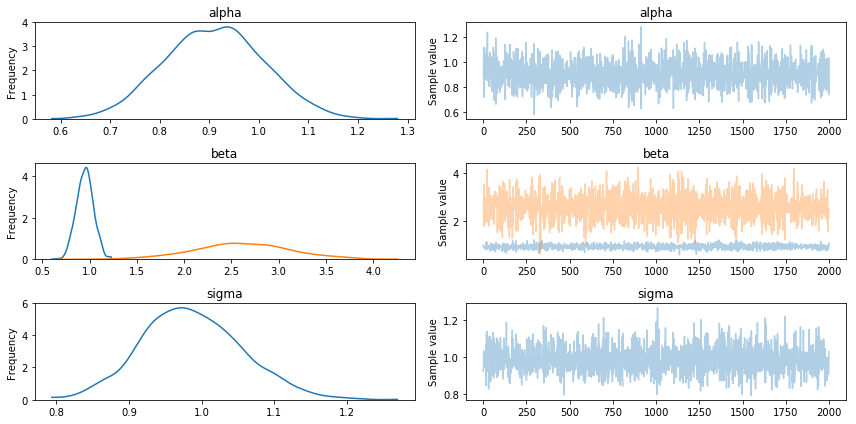

In [10]:
from pymc3 import traceplot

traceplot(trace);

In [11]:
from pymc3 import summary

summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.909            0.099            0.002            [0.716, 1.100]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.718          0.840          0.910          0.977          1.106


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.950            0.089            0.002            [0.773, 1.116]
  2.607            0.516            0.011            [1.530, 3.601]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.778          0.890          0.951          1.008          1.124
  1.575          2.278          2.601   

In [13]:
0.937*206

193.02200000000002